In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imsave
%matplotlib inline  
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from pycochleagram import cochleagram as cgram
from pycochleagram import erbfilter as erb
from pycochleagram import utils
from scipy.signal import welch, decimate, resample
import argparse
import os
from random import choice
from time import sleep, time

In [3]:
audio_name = 'male_s4_600'
audio_path = '../data/audio/'+audio_name+'.wav'
ipd.Audio(audio_path)


audio, sr = librosa.load(audio_path,duration=600)
audio_dur = librosa.get_duration(y=audio,sr=sr)


In [4]:
print(len(audio)/sr)

600.0


22050


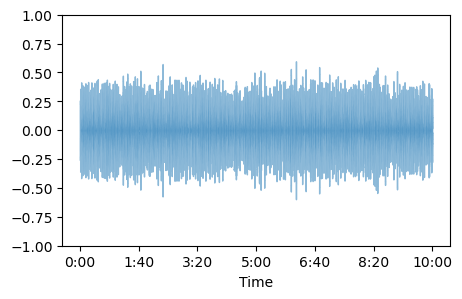

In [29]:
print(sr)
plt.figure(figsize=(5,3))
librosa.display.waveshow(audio,alpha=0.5,)
plt.ylim(-1,1)
plt.show()

In [5]:
### split audio to segments (300ms)

split_time = 300
num_seg = audio_dur * 1000 / split_time

sp_idx = np.arange(1,num_seg)* sr * split_time / 1000
sp_idx = sp_idx.astype(int)
audio_seg = np.split(audio,sp_idx)
print(audio_seg[-1])

[ 7.3286863e-03  7.3619843e-03  7.1789417e-03 ... -5.9403342e-06
  4.8255852e-06 -4.0261307e-06]


In [ ]:
## construct coch
imag_size = 256
imag_arr = np.empty((0,imag_size,imag_size))
#### for each audio
for i,s_audio in enumerate(audio_seg):
    sample_factor=4
    downsample=1000 # dowsample to 200 HZ
    nonlinearity=None # db, power
    n = 50  # default filter for low_lim=50 hi_lim=20000
    low_lim = 30  # this is the default for cochleagram.human_cochleagram ### modified
    hi_lim = 7860  # this is the default for cochleagram.human_cochleagram
    # # 3/10 power compression
    coch_pow = cgram.human_cochleagram(s_audio, sr, n, sample_factor=sample_factor, \
        downsample=downsample, nonlinearity='power', strict=False)
    tmp = resample(coch_pow,imag_size,domain='freq')
    tmp = resample(tmp.T,imag_size,domain='time').T
    imag_arr = np.append(imag_arr, np.array([tmp]), axis=0)
    imag_name = audio_name + '_' + str(i) + '.png'
    imag_path = '../data/images/' + audio_name + '/' + imag_name
    imsave(imag_path, tmp)
    print(imag_name + ' saved ...')

In [10]:
np.save('../data/'+audio_name+'_imags.npy',imag_arr)

## Seperate to train and test

In [1]:
import numpy as np

In [3]:
female_imags = np.load("../data/female_s1_imags.npy")
male_images = np.load("../data/male_s4_600_imags.npy")

In [5]:
print(female_eeg_data.shape,male_eeg_data.shape)

(64, 60101) (64, 60101)


In [10]:
num_train = int(len(female_imags) * 0.7)
idx = np.arange(len(female_imags))
np.random.shuffle(idx)
train_idx = idx[:num_train]
test_idx = idx[num_train:]

In [11]:
train_female_imags = female_imags[train_idx]
train_male_imags = male_images[train_idx]
train_imags = np.concatenate((train_female_imags, train_male_imags), axis=0)

test_female_imags = female_imags[test_idx]
test_male_imags = male_images[test_idx]
test_imags = np.concatenate((test_female_imags, test_male_imags), axis=0)
np.save("../data/train/coch_imags.npy",train_imags)
np.save("../data/train/indices.npy",train_idx)
np.save("../data/test/coch_imags.npy",test_imags)
np.save("../data/test/indices.npy",test_idx)

In [13]:
female_eeg_data = np.load("../data/subj1_single_f.npy").T[:60000]
male_eeg_data = np.load("../data/subj1_single_m.npy").T[:60000]

num_times = 30
num_channels = 64
train_female_eeg_data = female_eeg_data.reshape(-1,num_channels*num_times)[train_idx].reshape(-1,num_channels)
train_male_eeg_data = male_eeg_data.reshape(-1,num_channels*num_times)[train_idx].reshape(-1,num_channels)
train_eeg_data = np.concatenate((train_female_eeg_data, train_male_eeg_data), axis=0)

test_female_eeg_data = female_eeg_data.reshape(-1,num_channels*num_times)[test_idx].reshape(-1,num_channels)
test_male_eeg_data = male_eeg_data.reshape(-1,num_channels*num_times)[test_idx].reshape(-1,num_channels)
test_eeg_data = np.concatenate((test_female_eeg_data, test_male_eeg_data), axis=0)

np.save("../data/train/eeg_data.npy",train_eeg_data)
np.save("../data/test/eeg_data.npy",test_eeg_data)

print(test_eeg_data.shape)
print(train_eeg_data.shape)

(36000, 64)


NameError: name 'train_egg_data' is not defined

In [14]:
print(train_eeg_data.shape)

(84000, 64)
